This notebook checks directionality of BCL2, an antiapoptotic gene. Significant p-value in Gbm but not in Endometrial Tumors. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import gseapy as gp

import cptac
import cptac.utils as u

In [2]:
def format_pval_annotation(pval_symbol, x1, x2, line_start = .05, line_height=.05):
    # for manual adjustment to pval annotations
    
    y, h = line_start, line_height
    plt.plot([x1, x1, x2, x2], #draw horizontal line
             [y, y+h, y+h, y], #vertical line
             lw=1.5, color= '.3')
    plt.text((x1+x2)*.5, # half between x coord
             y+h, pval_symbol, horizontalalignment='center', verticalalignment='bottom', color = "black")


In [20]:
def get_dataframe(test_gene_in, cancer_object, normal = False):
    p = cancer_object.join_omics_to_mutations(
        mutations_genes = [gene], omics_df_name = 'proteomics', omics_genes = test_gene_in) 
    
    if normal == False:
        p['binary_mutations'] = np.where(
                p[gene+'_Mutation_Status'] == 'Wildtype_Tumor', 'Wildtype', 'Mutated')
        tumors = p[p.Sample_Status == 'Tumor'] #drop Normal samples
        columns_to_drop = [gene+"_Mutation", gene+"_Location", gene+"_Mutation_Status", "Sample_Status"]
        mut_status = tumors.drop(columns_to_drop, axis = 1)
        #mut_status = mut_status.dropna(axis=1,how='all')
    else:
        p['binary_mutations'] = 'Mutated'
        p.loc[p['PTEN_Mutation_Status'] == 'Wildtype_Normal', 'binary_mutations'] = 'Normal'
        p.loc[p['PTEN_Mutation_Status'] == 'Wildtype_Tumor', 'binary_mutations'] = 'Wildtype'
        columns_to_drop = [gene+"_Mutation", gene+"_Location", gene+"_Mutation_Status", "Sample_Status"]
        mut_status = p.drop(columns_to_drop, axis = 1)
        mut_status = mut_status.dropna(axis=1,how='all')
        
    return mut_status

In [4]:
gbm = cptac.Gbm()
en = cptac.Endometrial()

In [5]:
gene = 'PTEN'
test_gene = 'BCL2'

Gbm

In [6]:
gbm_prot = get_dataframe(test_gene, gbm) #normal=True)
gbm_prot

Name,BCL2_proteomics,binary_mutations
Sample_ID,,
S001,1.233430,Mutated
S002,0.240583,Wildtype
S003,0.135680,Mutated
S004,0.193666,Mutated
S005,0.098269,Wildtype
...,...,...
S100,1.462247,Mutated
S101,-0.353524,Wildtype
S102,-0.513582,Wildtype


In [7]:
gbm_col_list = list(gbm_prot.columns)
gbm_col_list.remove('binary_mutations')

print("Doing t-test comparisons for GBM\n")
wrap_results = u.wrap_ttest(gbm_prot, 'binary_mutations', gbm_col_list, return_all=True)
wrap_results

Doing t-test comparisons for GBM

1 significant comparisons!


,Comparison,P_Value
0,BCL2_proteomics,0.023905


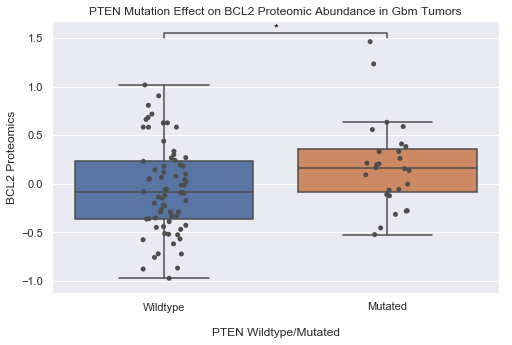

In [12]:
plt.rcParams['figure.figsize']=(8,5) #size of plot
sns.set(font_scale = 1)

boxplot = sns.boxplot(x='binary_mutations', y=test_gene+"_proteomics", 
                         order = ['Wildtype', 'Mutated'], data = gbm_prot, showfliers = False)    
boxplot.set_title('PTEN Mutation Effect on '+test_gene+' Proteomic Abundance in Gbm Tumors')
boxplot = sns.stripplot(x='binary_mutations', y=test_gene+"_proteomics", data = gbm_prot, jitter = True, 
                           color = ".3", order = ['Wildtype', 'Mutated'], dodge = True)
boxplot.set(xlabel = "\nPTEN Wildtype/Mutated", ylabel = test_gene+' Proteomics')

format_pval_annotation('*', 0, 1, 1.5)

plt.show()
plt.clf()
plt.close()

Endometrial

In [21]:
en_prot = get_dataframe(test_gene, en) #normal=True)
en_prot

Name,BCL2_proteomics,binary_mutations
Sample_ID,,
S001,-0.0339,Mutated
S002,-1.3400,Mutated
S003,NaN,Mutated
S005,-0.6830,Mutated
S006,1.2800,Wildtype
...,...,...
S099,-1.4200,Mutated
S100,-2.7900,Wildtype
S101,-1.1900,Wildtype


In [22]:
en_col_list = list(en_prot.columns)
en_col_list.remove('binary_mutations')

print("Doing t-test comparisons for En\n")
en_wrap_results = u.wrap_ttest(en_prot, 'binary_mutations', en_col_list, return_all=True)
en_wrap_results

Doing t-test comparisons for En

No significant comparisons.


,Comparison,P_Value
0,BCL2_proteomics,0.938228


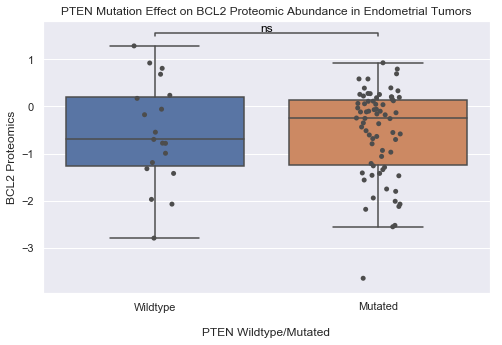

In [24]:
plt.rcParams['figure.figsize']=(8,5) #size of plot
sns.set(font_scale = 1)

boxplot = sns.boxplot(x='binary_mutations', y=test_gene+"_proteomics", 
                         order = ['Wildtype', 'Mutated'], data = en_prot, showfliers = False)    
boxplot.set_title('PTEN Mutation Effect on '+test_gene+' Proteomic Abundance in Endometrial Tumors')
boxplot = sns.stripplot(x='binary_mutations', y=test_gene+"_proteomics", data = en_prot, jitter = True, 
                           color = ".3", order = ['Wildtype', 'Mutated'], dodge = True)
boxplot.set(xlabel = "\nPTEN Wildtype/Mutated", ylabel = test_gene+' Proteomics')

format_pval_annotation('ns', 0, 1, 1.5)

plt.show()
plt.clf()
plt.close()